<a href="https://colab.research.google.com/github/LunabaLeeris/Regression-Notebook/blob/main/LogisticRegressionUsingNewtonsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This delves around the implementation of logistic regression using the newtons method.

Supposing the inverse exist, we can use the equation for the logistic regressio using newtons method using the formula below

$$
\theta^{(i + 1)} = \theta^i - (-TT^T)^-T(Y - S)
$$

where (d = number of dimensions | m = number of features)

$T \exists \mathbb{R}^{d\times m}$ = Training Data

$Y\exists\mathbb{R}^{m \times 1}$ = Training Output

$S\exists\mathbb{R}^{m \times 1}$ = Hypothesis which can be calculated as

**Note that this implementation uses a one dimensional parameter. A padding of all ones are added to take into account the y-intercept**

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[16.146873 ],
       [-3.4846296]], dtype=float32)>


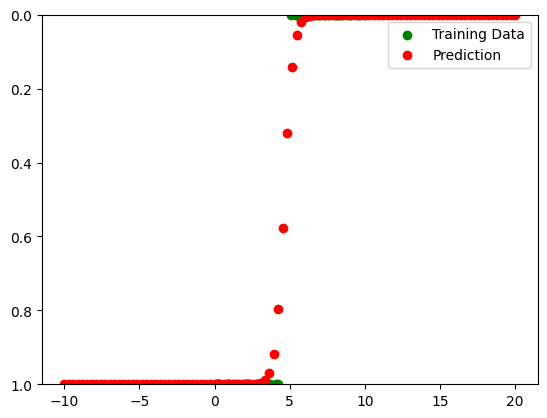

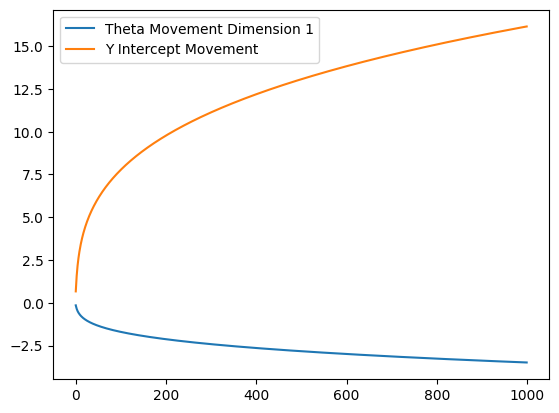

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

T = tf.constant([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [6.394267984578837, 0.25010755222666936, 2.7502931836911926, 2.2321073814882277, 7.364712141640124,
                  6.766994874229113, 8.921795677048454, 0.8693883262941615, 4.2192181968527045, 0.29797219438070344,
                  2.1863797480360336, 5.053552881033624, 0.26535969683863625, 1.988376506866485, 6.498844377795232,
                  5.449414806032166, 2.204406220406967, 5.892656838759088, 8.094304566778266, 0.06498759678061017,
                  8.05819251832808, 6.981393949882269, 3.4025051651799187, 1.5547949981178155, 9.572130722067811,
                  3.365945451126268, 0.9274584338014791, 0.9671637683346401, 8.474943663474598, 6.037260313668911,
                  8.071282732743802, 7.297317866938179, 5.506058857260264, 6.628240927476112, 1.3608912218786458,
                  8.26861603480089, 9.031856831867762, 4.068073127595591, 2.1800947301761057, 8.292046035674055,
                  0.18544794970161756, 0.7425796230289069, 6.1886091335565325, 5.390927201204537, 9.996660655937922,
                  6.852195003191236, 9.600818353483351, 7.594829816678685, 3.6796786383088254, 2.972352536223722]], dtype= tf.float32)

T_transpose = tf.transpose(T)
T_hesian_inverse = tf.linalg.inv(tf.multiply(-1, tf.matmul(T, T_transpose)))

Y = tf.constant([[0], [1], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [1], [1], [0],
                 [0], [1], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0],
                 [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1]], dtype= tf.float32)

THETA = tf.Variable([[0], [0]], dtype=tf.float32)

def plot_training_data_and_prediction():
  T_x = T.numpy()[1]                                  # Training Data
  Y_y = [y[0] for y in Y.numpy()]                     # Training Output
  P = [tf.ones(100), tf.linspace(-10., 20., 100)]     # Values To Predict
  H = tf.sigmoid(tf.matmul(tf.transpose(P), THETA))   # Hypothesis
  P_x = P[1]
  H_y = [h[0] for h in H]

  print(THETA)
  plt.scatter(T_x, Y_y, color="green", label="Training Data")
  plt.scatter(P_x, H_y, color="red", label="Prediction")
  plt.ylim(1, 0)

  plt.legend()
  plt.show()

def logistic_regression_using_newtonsmethod(iterations):
  THETA_H = [[], []]
  ITERATIONS = []

  for i in range(iterations):
    S = tf.sigmoid(tf.matmul(T_transpose, THETA))
    D = tf.matmul(T, tf.subtract(Y, S))
    THETA.assign(tf.subtract(THETA, tf.matmul(T_hesian_inverse, D)))
    THETA_H[0].append(THETA[0][0])
    THETA_H[1].append(THETA[1][0])
    ITERATIONS.append(i)

  plot_training_data_and_prediction()

  # plots how theta moves
  plt.plot(ITERATIONS, THETA_H[1], label="Theta Movement Dimension 1")
  plt.plot(ITERATIONS, THETA_H[0], label="Y Intercept Movement")

  plt.legend()
  plt.show()

# TEST
# PARAM 1 : Iterations
# With this we don't have to think about the learning rate!
# For only 100 iterations, we can get a satisfying result!
logistic_regression_using_newtonsmethod(1000)